# Pseudo Random distribution

In [1]:
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sps

from prd import get_prob_from_c, test_prob_from_c, get_c_from_prob, generate_pr_sample, generate_sequence_sample

### Introduction

The aim of this notebook is to discuss the concept of Pseudo Random distribution and highlight its distinction from true randomness. This will be achieved through an introduction to Pseudo Random distribution, followed by a comparison between samples from Bernoulli distribution and Pseudo Random distributions. The resulting samples will then be converted into sequences and further analyzed. Finally, a histogram of both samples will be plotted and a demonstration of the computation of the $C$ constants will be provided.

### What is Pseudo Random distribution?

The pseudo-random distribution is a statistical mechanism that affects the functionality of certain probability-based items and abilities (in games like Warcraft 3 or Dota 2). The PRD increases the probability of an event occurring each time it fails to occur, but compensates by starting with a lower probability. As a result, the effects are more consistent.

The formula for calculating the probability of an effect occurring on the N-th test after the last successful occurrence is $P(N) = C * N$. Each time the effect could occur but doesn't, the PRD raises the probability of it happening on the next attempt by a constant $C$. This constant, which is also the initial probability, is lower than the listed probability of the effect it represents. Once the effect takes place, the counter is reset.  

As we said, if $X_i$ is an event on trial $i$, then PRD enforces that $P(X_N|\overline{X_i}  \:\    \forall i<N)= C*N$.  
Then $P(X = x_k) = (1-C)(1-2C)...(1-(k-1)C)kC = k!C\prod_{i=1}^{k-1}(\frac{1}{i}-C)$  
  
The expected value $E(X)$ gives the average number of trials made before success. If $P(X = x_k) = p_k$, then:
$$E(X) = \sum_{k=1}x_k p_k = c + 2^2c(1-c)c + … + (n-1)^2(1-c)…(1-(n-2)c)(n-1)c + n(1-c)…(1-(n-1)c) = \frac{1}{p}$$
  
Note that right part is exactly a number of expected trials before success.



### The difference between PRD and true randomness

#### Initial samples analysis

As a first step we will create one sample from pseudo random distribution and other sample from Bernoulli distribution with the same parameters: `p`, `size`.  

> The Bernoulli distribution is a discrete probability distribution that describes a random variable that can take one of two possible values, usually represented by 0 and 1. The Bernoulli distribution is characterized by a single parameter, denoted as $p$, which represents the probability of the random variable taking the value 1. The probability mass function of a Bernoulli distribution is given by:
>
>$$ P(X=k) =
>\begin{cases}
>    1-p & \text{if } k=0 \\
>    p & \text{if } k=1
>\end{cases}
>$$
>
>where $k$ is the value of the random variable and $p$ is the parameter of the distribution. The mean and variance of the Bernoulli distribution are given by:
>$$
>\mu = p; \ \ \sigma^2 = p(1-p)
>$$

In [2]:
p = 0.1
size = 1000000

sample_pr = generate_pr_sample(p, size)
sample = sps.bernoulli(p).rvs(size=size)
print(f'This is how part of a sample looks like: {sample_pr[:30]}')

This is how part of a sample looks like: [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


One can view this sample as a record of trials, where `1` indicates success (or Proc)

In [3]:
print(f"Mean of pseudo random sample: {sample_pr.mean():.6f}, variance: {sample_pr.var():.6f}, and length: {len(sample_pr)}")
print(f"Mean of Bernoulli sample:     {sample.mean():.6f}, variance: {sample.var():.6f}, and length: {len(sample)}")

Mean of pseudo random sample: 0.100249, variance: 0.090199, and length: 1000000
Mean of Bernoulli sample:     0.099854, variance: 0.089883, and length: 1000000


Now let's statistically test whether means are equal. We'll perform two-sample t-test.  
The null hypothesis is that the means of the two populations are equal, and the alternative hypothesis is that they are not equal.

In [4]:
alpha = 0.05

t_stat, p_value = sps.ttest_ind(sample, sample_pr, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value > alpha: 
    print('Null hypothesis is not rejected')
else:
    print('Null hypothesis is rejected')

t-statistic: -0.9308106505856379
p-value: 0.3519516317310528
Null hypothesis is not rejected


Result of this test is that there is no significant difference between means. This is exactly what we wanted so far. 

#### Transformed samples analysis

We will now generate two additional samples by transforming the previous samples into sequences that represent either the number of trials leading up to the first success or Proc (including the success) or the position of the n-th success.  
Note that this transformation will convert our sample from being generated from a Bernoulli distribution to a Geometric distribution.
  
>The geometric distribution is characterized by a single parameter, denoted as `p`, which represents the probability of success in each independent trial. The probability mass function of a geometric distribution is given by:
>
>$$
>P(X=k) = (1-p)^{k-1}p
>$$
>
>where $k$ is the number of trials needed to achieve the first success and $p$ is the probability of success in each independent trial. The mean and variance of the geometric distribution are given by:
>
>$$
>\mu = \frac{1}{p}; \ \ \sigma^2 = \frac{1-p}{p^2}
>$$


Here is an example how it looks like:

In [5]:
seq_sample_pr = generate_sequence_sample(sample_pr)

print(f'Beginning of transformed sample: {seq_sample_pr[:10]}')
print(f'Beginning of initial sample:     {sample_pr[:30]}')

Beginning of transformed sample: [ 6  2  2 14 16 22 16  7  9 13]
Beginning of initial sample:     [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [6]:
seq_sample = generate_sequence_sample(sample)
print(F"Mean of transformed sample from PRD:                    {seq_sample_pr.mean():.6f}, variance: {seq_sample_pr.var():.6f}, and length: {len(seq_sample_pr)}")
print(F"Mean of transformed sample from Bernoulli distribution: {seq_sample.mean():.6f}, variance: {seq_sample.var():.6f}, and length: {len(seq_sample)}")

Mean of transformed sample from PRD:                    9.975062, variance: 25.533817, and length: 100249
Mean of transformed sample from Bernoulli distribution: 10.014491, variance: 89.879564, and length: 99854


Again we can see that means look the same, but variance of PRD sample drastically decreased.

Now again let's test whether means are equal via two-sample t-test.

In [7]:
alpha = 0.05

t_stat, p_value = sps.ttest_ind(seq_sample, seq_sample_pr, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value > alpha: 
    print('Null hypothesis is not rejected')
else:
    print('Null hypothesis is rejected')

t-statistic: 1.1602679433916514
p-value: 0.2459415515824987
Null hypothesis is not rejected


Let's test whether variances are significantly different.  
We will perform Brown-Forsythe test, as we assume that the distributions are not normal (as we can see on graphic below).  
Null hypothesis is that the variances of two groups are equal.

In [8]:
alpha = 0.05

stat, p_value = sps.levene(seq_sample, seq_sample_pr, center='median')

print('statistic:', stat)
print('p-value:', p_value)

if p_value > alpha:
    print('Null hypothesis is not rejected')
else:
    print('Null hypothesis is rejected')

statistic: 9682.095319869433
p-value: 0.0
Null hypothesis is rejected


The difference of variances is statistically significant.

It is time to plot histogram of samples:

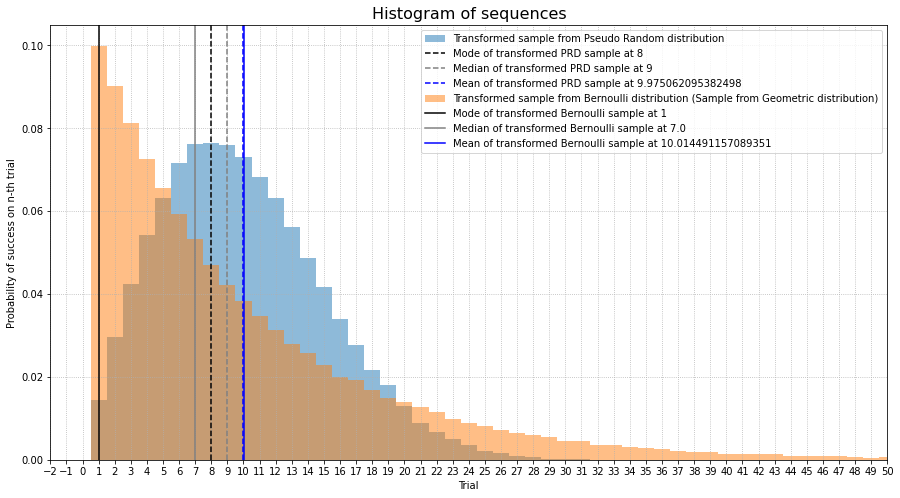

In [9]:
grid = np.linspace(-3, 3, 1000)
bins = np.arange(1, max(seq_sample) + 2) - 0.5

plt.figure(figsize=(15, 8))
plt.hist(seq_sample_pr, bins=bins, alpha=0.5, density=True,
         label='Transformed sample from Pseudo Random distribution')
measurements = [st.mode(seq_sample_pr), st.median(seq_sample_pr), seq_sample_pr.mean()]
names = ['Mode of transformed PRD sample', 'Median of transformed PRD sample', 'Mean of transformed PRD sample']
colors = ['black', 'gray', 'blue']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=1.5, label='{0} at {1}'.format(name, measurement), c=color)

plt.hist(seq_sample, bins=bins, alpha=0.5, density=True,
         label='Transformed sample from Bernoulli distribution (Sample from Geometric distribution)')
measurements = [st.mode(seq_sample), st.median(seq_sample), seq_sample.mean()]
names = ['Mode of transformed Bernoulli sample', 'Median of transformed Bernoulli sample', 'Mean of transformed Bernoulli sample']
colors = ['black', 'gray', 'blue']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='-', linewidth=1.5, label='{0} at {1}'.format(name, measurement), c=color)

plt.xlim(-0.5, 20)
plt.xticks(np.arange(-2, 51))
plt.legend(fontsize=11, loc=1)
plt.grid(ls=':')
plt.xlabel('Trial')
plt.ylabel('Probability of success on n-th trial')
plt.title('Histogram of sequences', fontsize=16)
plt.legend()
plt.show()

The distinctions are evident: the likelihood of consecutive successes (e.g., attack modifiers in Dota 2) is much lower, the PRD distribution is skewed to the right, and the probability eventually drops to zero.

### Conclusion

In conclusion, this notebook introduced the concept of Pseudo Random distribution and compared it to true randomness using samples generated from both Bernoulli and PRD. The differences between the two distributions were highlighted by transforming the samples into sequences and analyzing the resulting histograms. The tests performed showed that the means of the two distributions were statistically equal, but the variances were significantly different, variance in PRD sample is drastically lower. It was also shown that the PRD has a lower likelihood of consecutive successes.

# Extra

#### Table of calculated $C$'s

You can generate corresponding constant `C` for desired probability with the use of a function `get_c_from_prob(p)`.  
  
Here is an easy example with table of columns calculated `C`'s for every probability in `range(1,100)` and `experimental P` which we can obtaing using function `test_prob_from_c(C, iterations)`.

In [10]:
iterations = 100000

print('P            C                Experimental P   Percent change of P')
for i in range(1, 100):
    P = i / 100.0
    C = get_c_from_prob(P)
    experimental_P = test_prob_from_c(C, iterations)
    print(f'{P:.2f}         {C:.6f}         {experimental_P:.6f}         {(experimental_P - P) / P * 100:6f} %')

P            C                Experimental P   Percent change of P
0.01         0.000156         0.010002         0.018033 %
0.02         0.000620         0.020009         0.046782 %
0.03         0.001386         0.030042         0.140848 %
0.04         0.002449         0.039986         -0.035068 %
0.05         0.003802         0.050029         0.057833 %
0.06         0.005440         0.060057         0.095050 %
0.07         0.007359         0.070100         0.143526 %
0.08         0.009552         0.079949         -0.063400 %
0.09         0.012016         0.089991         -0.010159 %
0.10         0.014746         0.099919         -0.080934 %
0.11         0.017736         0.109942         -0.052672 %
0.12         0.020983         0.119726         -0.228278 %
0.13         0.024482         0.130056         0.043149 %
0.14         0.028230         0.139757         -0.173618 %
0.15         0.032221         0.150202         0.134832 %
0.16         0.036452         0.159994         -0.004000